In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [10]:
ds=pd.read_csv('/content/drive/MyDrive/company.csv')
ds

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [11]:
ds.shape

(200, 4)

In [13]:
ds.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
x=ds.drop('Sales',axis=1).values
y=ds['Sales'].values

In [15]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [16]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [17]:
x_paper=x[:,2]

In [18]:
x_paper

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  23.5,  49.6,  26.2,  18.3,  19.5,  12.6,
        22.9,  22.9,  40.8,  43.2,  38.6,  30. ,   0.3,   7.4,   8.5,
         5. ,  45.7,  35.1,  32. ,  31.6,  38.7,   1.8,  26.4,  43.3,
        31.5,  35.7,  18.5,  49.9,  36.8,  34.6,   3.6,  39.6,  58.7,
        15.9,  60. ,  41.4,  16.6,  37.7,   9.3,  21.4,  54.7,  27.3,
         8.4,  28.9,   0.9,   2.2,  10.2,  11. ,  27.2,  38.7,  31.7,
        19.3,  31.3,  13.1,  89.4,  20.7,  14.2,   9.4,  23.1,  22.3,
        36.9,  32.5,  35.6,  33.8,  65.7,  16. ,  63.2,  73.4,  51.4,
         9.3,  33. ,  59. ,  72.3,  10.9,  52.9,   5.9,  22. ,  51.2,
        45.9,  49.8, 100.9,  21.4,  17.9,   5.3,  59. ,  29.7,  23.2,
        25.6,   5.5,  56.5,  23.2,   2.4,  10.7,  34.5,  52.7,  25.6,
        14.8,  79.2,  22.3,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,
        50.6,   9.2,

In [19]:
x_tv=x[:,0]

In [20]:
x_tv

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [21]:
type(x_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [22]:
x_tv.shape,y.shape

((200,), (200,))

In [23]:
x_tv=x_tv.reshape(-1,1)
y=y.reshape(-1,1)

In [24]:
x_tv.shape,y.shape


((200, 1), (200, 1))

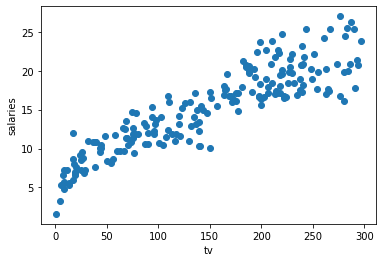

In [25]:
plt.scatter(x_tv,y)
plt.xlabel('tv')
plt.ylabel('salaries')
plt.show()

In [26]:
reg=linear_model.LinearRegression()
reg.fit(x_tv,y)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
y_pred = reg.predict(x_tv)
print(f'MAE ={mean_absolute_error(y,y_pred)}')
print(f'MSE={mean_squared_error(y,y_pred)}')
print(f'RMSE={np.sqrt(mean_squared_error(y,y_pred))}')
print(f'R_2={r2_score(y,y_pred)}')


MAE =1.8305872641932412
MSE=5.2177438977951285
RMSE=2.2842381438447106
R_2=0.8121757029987414


In [29]:

prediction_space=np.linspace(min(x_tv),max(x_tv)).reshape(-1,1)


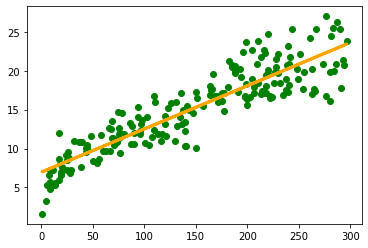

In [30]:
plt.scatter(x_tv,y,color='green')
plt.plot(x_tv,reg.predict(x_tv),color='orange',linewidth=3)
plt.show()